## Tensors

We started from data stored in multidimensional NumPy arrays, also called tensors. In general, all current machine learning systems use tensors as their basic data structure.

In [2]:
import numpy as np

### Scalar (rank-0 tensors)
A tensor that contains only one number is called a scalar

In [3]:
x = np.array(12)
x

array(12)

In [4]:
x.ndim

0

In [5]:
x.shape

()

### Vectors (rank-1 tensors)
An array of numbers is called a vector, or rank-1 tensor, or 1D tensor.

In [6]:
x = np.array([2, 3, 5, 6, 1, 2])
x

array([2, 3, 5, 6, 1, 2])

In [7]:
x.ndim

1

In [8]:
x.shape

(6,)

### Matrices (rank-2 tensors)
An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to as rows and columns).

In [9]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [10]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [11]:
x.ndim

2

In [12]:
x.shape

(3, 5)

In [13]:
x.dtype

dtype('int32')

### Rank-3 and higher-rank tensors
If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers.

In [14]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [15]:
x.dtype

dtype('int32')

In [16]:
x.ndim

3

In [17]:
x.shape

(3, 3, 5)

### A tensor is defined by* three key attributes:

1. **Number of axes (rank)**
2. **Shape** This is a tuple of integers that describes how many dimensions the tensor has along each axis.
3. **Data type** (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

## Manipulating Tensors in NumPy

In [18]:
from tensorflow.keras.datasets import mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Selecting specific elements in a tensor is called **tensor slicing**.

The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [20]:
my_slice = train_images[10: 100]
my_slice.shape

(90, 28, 28)

It’s equivalent to this more detailed notation, which specifies a start index and stop index for the **slice along each tensor axis.**

In [21]:
my_slice = train_images[10: 100, :, :]
my_slice.shape

(90, 28, 28)

Also equivalent to:

In [22]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In general, you may select slices between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this:

In [23]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

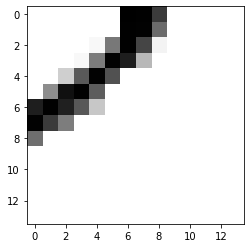

In [24]:
import matplotlib.pyplot as plt

plt.imshow(my_slice[1], cmap=plt.cm.binary)
plt.show()

In [28]:
print(my_slice[1])  #

[[  0   0   0   0   0   0 255 253 196   0   0   0   0   0]
 [  0   0   0   0   0   0 253 252 148   0   0   0   0   0]
 [  0   0   0   0   7 135 253 186  12   0   0   0   0   0]
 [  0   0   0   7 131 252 225  71   0   0   0   0   0   0]
 [  0   0  48 165 252 173   0   0   0   0   0   0   0   0]
 [  0 114 238 253 162   0   0   0   0   0   0   0   0   0]
 [225 253 223 167  56   0   0   0   0   0   0   0   0   0]
 [252 196 130   0   0   0   0   0   0   0   0   0   0   0]
 [145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


The plot above is the bottom right 14 pixels of the full 28x28 pixel image below.

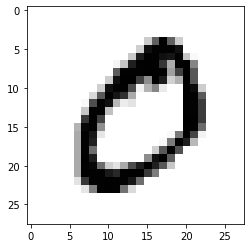

In [25]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show()

In [31]:
# print(train_images[1])

### Real-world examples of data tensors
Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:
 * **Vector data** — Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)
 * **Timeseries data or sequence data** — Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature vectors
 * **Images** — Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
 * **Video** — Rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images

In [26]:
n = np.array([2, 4.2])
n.dtype

dtype('float64')

In [27]:
n[0]

2.0